# Not a BEE Project

## Now about Rabbits 
### and foxes


In [141]:
%matplotlib inline

from modsim import *

### INITIAL FUNCTIONS

In [142]:
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    adults = TimeSeries()
    juveniles = TimeSeries()
    adults[system.t0] = system.adult_pop0
    juveniles[system.t0] = system.juvenile_pop0
    
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        mature_juveniles = system.mature_rate * juveniles[t] 
        
        juveniles[t+1] = juveniles[t] + births - mature_juveniles
        adults[t+1] = adults[t] + mature_juveniles - deaths
        
    system.adults = adults
    system.juveniles = juveniles

def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults, 'bo-', label='adults')
    plot(system.juveniles, 'ro-', label ='juveniles')
    decorate(xlabel='Season', 
             ylabel='Rabbit population',
             title=title)   
    
system = System(t0 = 0, 
                t_end = 10,
                adult_pop0 = 10,
                juvenile_pop0 = 0,
                birth_rate = 0.9,
                death_rate = 0.5,
                mature_rate = .33)

#run_simulation(system)
#plot_results(system, title='Proportional growth model')

### Defining Fox related variables
-death rate of rabbits due to fox encounters

-death of foxesdue to disease, age, etc.

-fox growth rate


In [255]:
new_system = System(t0 = 0,
                    t_end = 5,
                    rabbit_pop = 500,
                    fox_pop = 5,
                    rabbit_birth_rate = .04,
                    rabbit_death_rate = .01,
                    fox_birth_rate = .001,
                    fox_death_rate = .03)

In [256]:
def run_simulation(system):
    
    adult_rabbits = TimeSeries()
    adult_rabbits[system.t0] = system.rabbit_pop
    
    adult_foxes = TimeSeries()
    adult_foxes[system.t0] = system.fox_pop
    
    for t in linrange(system.t0, system.t_end):
        rabbit_births = system.rabbit_birth_rate * adult_rabbits[t]
        rabbit_deaths = system.rabbit_death_rate * adult_rabbits[t] * adult_foxes[t]
        
        fox_births = system.fox_birth_rate * adult_foxes[t] * adult_rabbits[t]
        fox_deaths = system.fox_death_rate * adult_foxes[t]
        print(fox_deaths)
        adult_rabbits[t+1] = adult_rabbits[t] + rabbit_births - rabbit_deaths
        if(adult_rabbits[t+1] < 0):
            adult_rabbits[t+1] = 0
        adult_foxes[t+1] = adult_foxes[t] + fox_births - fox_deaths
        if(adult_foxes[t+1] < 0):
            adult_foxes[t+1] = 0
        
    system.foxes  = adult_foxes
    system.rabbits = adult_rabbits

In [257]:
def plot_results(system, title=title):
    
    newfig()
    plot(system.rabbits, 'bo-', label='rabbits')
    plot(system.foxes, 'ro-', label ='foxes')
    decorate(xlabel='Season', 
             ylabel='Population',
             title= 'Rabbit vs. Fox Populations')   

0.15
0.2205
0.3230325
0.467885926069
0.662544905852
0.903920476489


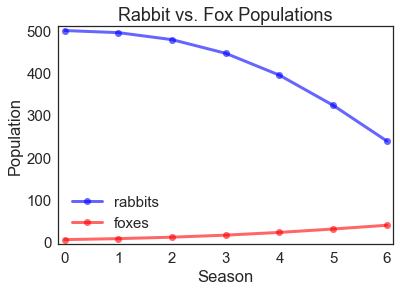

In [258]:
run_simulation(new_system)
plot_results(new_system)


In [259]:
new_system.rabbits


,value
0,500.000000
1,495.000000
2,478.417500
3,446.039400
4,394.315790
5,323.004449
6,238.601182


In [260]:
new_system.foxes


,value
0,5.000000
1,7.350000
2,10.767750
3,15.596198
4,22.084830
5,30.130683
6,38.959107
